# Exploratory Data Analysis

We will use the Titanic Dataset for the ML competition on Kaggle (https://www.kaggle.com/competitions/titanic/overview)

The competition is simple: we want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.

![](Image/Kaggle.png)

## Load the training dataset

Download the `train.csv` and `test.csv` data files from Moodle. Use this code box for importing the usual libraries (`numpy`, `pandas`, `seaborn`) and for loading the two files as Pandas dataframes.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

#Load the data
train_df = pd.read_csv('Data/Titanic/train.csv')
test_df = pd.read_csv('Data/Titanic/test.csv')

## Explore the data

For now, we will work with the training dataset.
First of all, always look at how the data is recorded. Print here the first few lines of the train dataset.

In [42]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **VARIABLE DESCRIPTIONS**

* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2** or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

Another thing to always check is the extension of the dataset: how many data points do we have? How many features?

In [43]:
# Your Answer here

With the help of a useful Pandas dataframe method, print some general information on the dataset.

In [44]:
# Your Answer here

With the help of another useful Pandas dataframe method, print some general-use statistics over the dataset values

In [45]:
# Your Answer here

## Missing Value and Duplicated

Check whether there are duplicated data points

In [46]:
# Your Answer here

Define a function for counting the number of missing values in each column containing at least one, and visualize it as a dataframe selection

In [47]:
# To not change
def count_null(df):
    null_df = pd.DataFrame(df.isnull().sum(), columns=["Count"])
    return null_df[null_df["Count"] > 0]

In [48]:
# Your Answer here

The analysis should bring you to have three columns with some missing data: `Age`, `Cabin`, `Embarked`. Let's see how to fill in the missing data.

### Cabin Feature

**Hypothesis** : Assume that all the passengers who are travelling without a personal cabin have a missing Cabin value. This is a reasonable hypothesis. Let’s update the missing cabin value as “X”

In [49]:
train_df["Cabin"] = train_df["Cabin"].apply(lambda x: "X" if pd.isnull(x) or x == "T" else x)
train_df["Cabin"].head()

0       X
1     C85
2       X
3    C123
4       X
Name: Cabin, dtype: object

### Embarked Feature

**Hypothesis** : Since only 2 are missing we can assume that the one missing are the one that appear more often (i.e. the mode). Replace the missing value with the Mode.

In [50]:
# Your Answer here

### Age Feature

Let's visulaize again the statistics for the `Age` feature only

In [51]:
# Let's visualize the Age attribute
train_df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Is the distribution approximately Normal ? Draw a histogram of the ages to check

In [52]:
# Your Answer here

We could adopt a solution like the one for the `Embarked` column, and fill the NaN values with the mean of the column. Let's try, and then visualize the same histogram again. Does it seem a reasonable choice? What is the problem of this approach?

In [53]:
# Your Answer here

In [54]:
# Your Answer here

**Your answer here**

Another approach is to just delete the entries with missing `Age`. This will result in a smaller dataset, but will not introduce any new problem. Let's try this approach and visualize the distribution once again.

**WARNING:** if you replaced NaN values directly in the `Age` column, remember to:
1. Comment the code of the box above
2. Rerun the notebook from the beginning

In [55]:
# Your Answer here

Finally, check that all NaN have been treated

In [56]:
# Your Answer here

## Correlation Plot

How correlated are the features of this table? Use `seaborn` to plot the correlation matrix by means of a heat map plot. What you can understand form this plot?

In [57]:
# Your Answer here

In [58]:
# Your Answer here

## Dataset balance

We will now check how balanced our dataset is. First, let's make a bar plot for comparing the number of survived and deceased passengers

In [59]:
# Your Answer here

## Class and Survival Rate

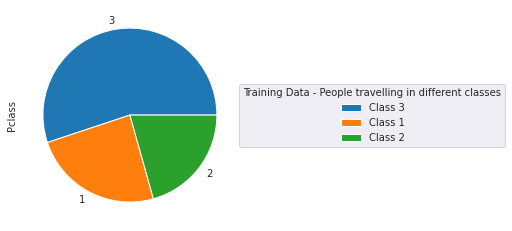

In [60]:
# Do not edit
fig_pclass = train_df.Pclass.value_counts().plot.pie().legend(labels=["Class 3","Class 1","Class 2"], loc='center right', bbox_to_anchor=(2.25, 0.5)).set_title("Training Data - People travelling in different classes")


Pclass or passenger class represents the traveling class of commuter. There were three classes. In the combined dataset, a clear majority (709) traveled in the third class, followed by the second (277) and then the first (323).

The number of passengers in the third class was more than the number of passengers in first and second class combined.

Make another bar plot where deceased and survived passengers are split by passenger class. What do you notice?

In [61]:
# Your Answer here

**More than 40% of the first class passengers were rescued. The pattern differed for the second and third class survivors as roughly around 70% of the second class passengers lost their lives. The numbers skyrocketed for the third class passengers. More than 80% of the third class passengers couldn't survive the disaster.**

## Sex and Survival Rate

Make a bar plot to show the number of male and female passengers, then another bar plot where survived and deceased passengers are split by gender. Then, write your observations.

In [62]:
# Your Answer here

In [63]:
# Your Answer here

# Your Answer here

Now conduct the same kind of analysis for these other features, and comment your findings.

## Age and Survival Rate

In order to consider the age, you will have to divide it ranges of 10 years. You can make a new column in the dataframe with this information. Then create a barplot of the survival rate depending on age

In [64]:
# Your Answer here

**Children below 10 years were the most spared, whereas 20-30 year old people were the most impacted. This data must be read in perspective: what was the age distribution in the three classes?**

In [65]:
# Your Answer here

**As expected, the majority of the 20-30 age range is composed by Class 3 passengers: for that age range, their abundance is significantly greater than average.**

## Fare and Survival Rate

Make a plot that show survival rate depending on the fare category

In [66]:
# Your Answer here

**It is clear that there is a strong correlation between the fare and the survival. The higher a tourist paid, the higher would be his chances to survive.**

## Embarked and Survival Rate

Make a plot that show survival rate depending on the port of embark

In [84]:
# Your Answer here

**In combined data, more than 70% of the people boarded from Southampton. Just under 20% boarded from Cherbourg and the rest boarded from Queenstown.**

**More People who boarded from Cherbourg survived than those who died. What could it be the causa?**

In [85]:
# Your Answer here

**Yep. Those boarding from Cherbourg were mainly the rich.**

**Unsurprisingly, it looks like status is the confounding variable that has the most effect on survival. Yet, it is not the only one: a high percentage of 0-10 aged children was saved, although very few of them were in Class 1.**

## Converting and Creating New Features

Some of the available data are not directly exploitable since they are discrete classes defined with keywords. Statistical models cannot process them, thus we have to convert them in a usable format.

In [69]:
# Do not edit !
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Convert Fare to int

Sometimes a simple type conversion is enough...

In [70]:
train_df['Fare'] = train_df['Fare'].astype(int)

Other types of categorical data can be mapped to integers :

### Binarize Gender

In [71]:
genders = {"male": 0, "female": 1}

train_df['Sex'] = train_df['Sex'].map(genders)

### Transform Port into integers

In [72]:
ports = {"S": 0, "C": 1, "Q": 2}

train_df['Embarked'] = train_df['Embarked'].map(ports)

Continuous data types can, as we have already done, be discretized (of course with a loss of information).

### Discretize Age

In [73]:
train_df['Age'] = train_df['Age'].astype(int)
train_df.loc[ train_df['Age'] <= 11, 'Age'] = 0
train_df.loc[(train_df['Age'] > 11) & (train_df['Age'] <= 18), 'Age'] = 1
train_df.loc[(train_df['Age'] > 18) & (train_df['Age'] <= 22), 'Age'] = 2
train_df.loc[(train_df['Age'] > 22) & (train_df['Age'] <= 27), 'Age'] = 3
train_df.loc[(train_df['Age'] > 27) & (train_df['Age'] <= 33), 'Age'] = 4
train_df.loc[(train_df['Age'] > 33) & (train_df['Age'] <= 40), 'Age'] = 5
train_df.loc[(train_df['Age'] > 40) & (train_df['Age'] <= 66), 'Age'] = 6
train_df.loc[ train_df['Age'] > 66, 'Age'] = 6

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [74]:
# See distribution
train_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

### Discretize Fare

In [75]:
train_df.loc[ train_df['Fare'] <= 7.91, 'Fare'] = 0
train_df.loc[(train_df['Fare'] > 7.91) & (train_df['Fare'] <= 14.454), 'Fare'] = 1
train_df.loc[(train_df['Fare'] > 14.454) & (train_df['Fare'] <= 31), 'Fare']   = 2
train_df.loc[(train_df['Fare'] > 31) & (train_df['Fare'] <= 99), 'Fare']   = 3
train_df.loc[(train_df['Fare'] > 99) & (train_df['Fare'] <= 250), 'Fare']   = 4
train_df.loc[ train_df['Fare'] > 250, 'Fare'] = 5
train_df['Fare'] = train_df['Fare'].astype(int)

In [76]:
# See distribution
train_df['Fare'].value_counts()

0    241
2    223
1    216
3    158
4     44
5      9
Name: Fare, dtype: int64

## Dataset Creation X, y

Now we have to create the dataset. Print again the first few lines of the training dataset and choose 5-7 features you think will be best for the training then, delete all the other columns. (Be sure to keep the `Survived` column: it's not a feature it's the truth value!)

In [77]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,0,X,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,3,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,0,X,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,1,X,0.0


Now place all the features on a dataframe `X` and the truth column in a dataframe `y`, and use the `train_test_split` function of `sklearn` for dividing each of them in training and test.

In [78]:
X = train_df.drop(["Survived", "Fare_Category", "Ticket", "PassengerId", "Name", "Age_Range", "Cabin"],axis=1)
y = train_df["Survived"]

KeyError: "['Fare_Category', 'Age_Range'] not found in axis"

In [79]:
print(X.shape)
print(type(X))
print(y.shape)
print(type(y))

(891, 7)
<class 'pandas.core.frame.DataFrame'>
(891,)
<class 'pandas.core.series.Series'>


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

The following code box trains a model and uses it for prediction. Use `sklearn` to produce a confusion matrix that analyzes the result. You can also use the `classification_report` function for having a more complete report.

In [81]:
# Do not edit!
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[88 17]
 [22 52]]


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       105
           1       0.75      0.70      0.73        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179

